In [2]:
pip install networkx



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
blood_indicators = [
    "Alanine aminotransferase ALT",
    "Albumin",
    "Alkaline phosphatase",
    "Aspartate aminotransferase AST",
    "Bicarbonate",
    "Blood urea nitrogen",
    "Chloride",
    "Cholesterol",
    "Creatine Phosphokinase (CPK)",
    "Creatinine",
    "Gamma Glutamyl Transferase (GGT)",
    "Globulin",
    "Glucose, serum",
    "Iron, refrigerated",
    "Lactate Dehydrogenase",
    "Osmolality",
    "Phosphorus",
    "Potassium",
    "Sodium",
    "Total bilirubin",
    "Total calcium",
    "Total protein",
    "Triglycerides",
    "Uric acid"
]

In [19]:
relationships = [
    ('Alanine aminotransferase ALT', 'Albumin', {'relation': 'Liver function, Kidney function'}),
    ('Alanine aminotransferase ALT', 'Aspartate aminotransferase AST', {'relation': 'Liver health, Heart health'}),
    ('Alanine aminotransferase ALT', 'Total Bilirubin', {'relation': 'Liver function'}),
    ('Albumin', 'Globulin', {'relation': 'Liver health'}),
    ('Albumin', 'Alanine aminotransferase ALT', {'relation': 'Liver health'}),
    ('Albumin', 'Blood urea nitrogen', {'relation': 'Liver function, Kidney function'}),
    ('Alkaline phosphatase', 'Alanine aminotransferase ALT', {'relation': 'Liver health, Bone health'}),
    ('Alkaline phosphatase', 'Aspartate aminotransferase AST', {'relation': 'Liver health, Heart health'}),
    ('Alkaline phosphatase', 'Gamma Glutamyl Transferase (GGT)', {'relation': 'Liver health, Bile ducts'}),
    ('Aspartate aminotransferase AST', 'Alanine aminotransferase ALT', {'relation': 'Liver health'}),
    ('Aspartate aminotransferase AST', 'Albumin', {'relation': 'Liver health'}),
    ('Aspartate aminotransferase AST', 'Total Bilirubin', {'relation': 'Heart health'}),
    ('Bicarbonate', 'Chloride', {'relation': 'Sodium, Potassium'}),
    ('Bicarbonate', 'Sodium', {'relation': 'Chloride, Potassium'}),
    ('Bicarbonate', 'Potassium', {'relation': 'Chloride, Sodium'}),
    ('Blood urea nitrogen', 'Creatinine', {'relation': 'Kidney function'}),
    ('Blood urea nitrogen', 'Albumin', {'relation': 'Kidney function'}),
    ('Blood urea nitrogen', 'Chloride', {'relation': 'Kidney function'}),
    ('Chloride', 'Bicarbonate', {'relation': 'Sodium, Potassium'}),
    ('Chloride', 'Sodium', {'relation': 'Bicarbonate, Potassium'}),
    ('Chloride', 'Potassium', {'relation': 'Bicarbonate, Sodium'}),
    ('Cholesterol', 'Triglycerides', {'relation': 'High-Density Lipoprotein (HDL), Low-Density Lipoprotein (LDL)'}),
    ('Cholesterol', 'High-Density Lipoprotein (HDL)', {'relation': 'Triglycerides, Low-Density Lipoprotein (LDL)'}),
    ('Cholesterol', 'Low-Density Lipoprotein (LDL)', {'relation': 'Triglycerides, High-Density Lipoprotein (HDL)'}),
    ('Creatine Phosphokinase (CPK)', 'Lactate Dehydrogenase (LDH)', {'relation': 'Muscle health, Heart health'}),
    ('Creatine Phosphokinase (CPK)', 'Aspartate aminotransferase AST', {'relation': 'Heart health'}),
    ('Creatine Phosphokinase (CPK)', 'Alanine aminotransferase ALT', {'relation': 'Muscle health'}),
    ('Creatinine', 'Blood urea nitrogen', {'relation': 'Phosphorus, Potassium'}),
    ('Creatinine', 'Phosphorus', {'relation': 'BUN, Potassium'}),
    ('Creatinine', 'Potassium', {'relation': 'BUN, Phosphorus'}),
    ('Gamma Glutamyl Transferase (GGT)', 'Alkaline phosphatase', {'relation': 'ALT, AST'}),
    ('Gamma Glutamyl Transferase (GGT)', 'ALT', {'relation': 'Alkaline phosphatase, AST'}),
    ('Gamma Glutamyl Transferase (GGT)', 'Aspartate aminotransferase AST', {'relation': 'Liver health'}),
    ('Globulin', 'Albumin', {'relation': 'Total Protein, A/G Ratio'}),
    ('Globulin', 'Total Protein', {'relation': 'Albumin, A/G Ratio'}),
    ('Globulin', 'A/G Ratio', {'relation': 'Albumin, Total Protein'}),
    ('Glucose, serum', 'Hemoglobin A1c', {'relation': 'Insulin, C-Peptide'}),
    ('Glucose, serum', 'Insulin', {'relation': 'Hemoglobin A1c, C-Peptide'}),
    ('Glucose, serum', 'C-Peptide', {'relation': 'Hemoglobin A1c, Insulin'}),
    ('Iron, refrigerated', 'Total Iron Binding Capacity (TIBC)', {'relation': 'Transferrin, Ferritin'}),
    ('Iron, refrigerated', 'Transferrin', {'relation': 'Total Iron Binding Capacity (TIBC), Ferritin'}),
    ('Iron, refrigerated', 'Ferritin', {'relation': 'Total Iron Binding Capacity (TIBC), Transferrin'}),
    ('Lactate Dehydrogenase', 'Creatine Phosphokinase CPK', {'relation': 'Aspartate aminotransferase AST, Alanine aminotransferase ALT'}),
    ('Lactate Dehydrogenase', 'Aspartate aminotransferase AST', {'relation': 'CPK, Alanine aminotransferase ALT'}),
    ('Lactate Dehydrogenase', 'Alanine aminotransferase ALT', {'relation': 'CPK, Aspartate aminotransferase AST'}),
    ('Osmolality', 'Sodium', {'relation': 'Potassium, Chloride'}),
    ('Osmolality', 'Potassium', {'relation': 'Sodium, Chloride'}),
    ('Osmolality', 'Chloride', {'relation': 'Sodium, Potassium'}),
    ('Phosphorus', 'Calcium', {'relation': 'Vitamin D, Parathyroid Hormone (PTH)'}),
    ('Phosphorus', 'Vitamin D', {'relation': 'Calcium, Parathyroid Hormone (PTH)'}),
    ('Phosphorus', 'Parathyroid Hormone (PTH)', {'relation': 'Calcium, Vitamin D'}),
    ('Potassium', 'Sodium', {'relation': 'Chloride, Bicarbonate'}),
    ('Potassium', 'Chloride', {'relation': 'Sodium, Bicarbonate'}),
    ('Potassium', 'Bicarbonate', {'relation': 'Sodium, Chloride'}),
    ('Sodium', 'Potassium', {'relation': 'Chloride, Bicarbonate'}),
    ('Sodium', 'Chloride', {'relation': 'Potassium, Bicarbonate'}),
    ('Sodium', 'Bicarbonate', {'relation': 'Potassium, Chloride'}),
    ('Total bilirubin', 'Aspartate aminotransferase AST', {'relation': 'Alanine aminotransferase ALT, Alkaline phosphatase'}),
    ('Total bilirubin', 'Alanine aminotransferase ALT', {'relation': 'Aspartate aminotransferase AST, Alkaline phosphatase'}),
    ('Total bilirubin', 'Alkaline phosphatase', {'relation': 'Aspartate aminotransferase AST, Alanine aminotransferase ALT'}),
    ('Total calcium', 'Ionized Calcium', {'relation': 'Vitamin D, Parathyroid Hormone (PTH)'}),
    ('Total calcium', 'Vitamin D', {'relation': 'Ionized Calcium, Parathyroid Hormone (PTH)'}),
    ('Total calcium', 'Parathyroid Hormone (PTH)', {'relation': 'Ionized Calcium, Vitamin D'}),
    ('Total protein', 'Albumin', {'relation': 'Globulin, A/G Ratio'}),
    ('Total protein', 'Globulin', {'relation': 'Albumin, A/G Ratio'}),
    ('Total protein', 'A/G Ratio', {'relation': 'Albumin, Globulin'}),
    ('Triglycerides', 'Cholesterol', {'relation': 'High-Density Lipoprotein (HDL), Low-Density Lipoprotein (LDL)'}),
    ('Triglycerides', 'High-Density Lipoprotein (HDL)', {'relation': 'Cholesterol, Low-Density Lipoprotein (LDL)'}),
    ('Triglycerides', 'Low-Density Lipoprotein (LDL)', {'relation': 'Cholesterol, High-Density Lipoprotein (HDL)'}),
    ('Uric acid', 'Potassium', {'relation': 'Sodium, Chloride'}),
    ('Uric acid', 'Sodium', {'relation': 'Potassium, Chloride'}),
    ('Uric acid', 'Chloride', {'relation': 'Sodium, Potassium'})
]


In [20]:
G = nx.Graph()
G.add_nodes_from(blood_indicators)
G.add_edges_from(relationships)

In [21]:
pip install graphviz



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


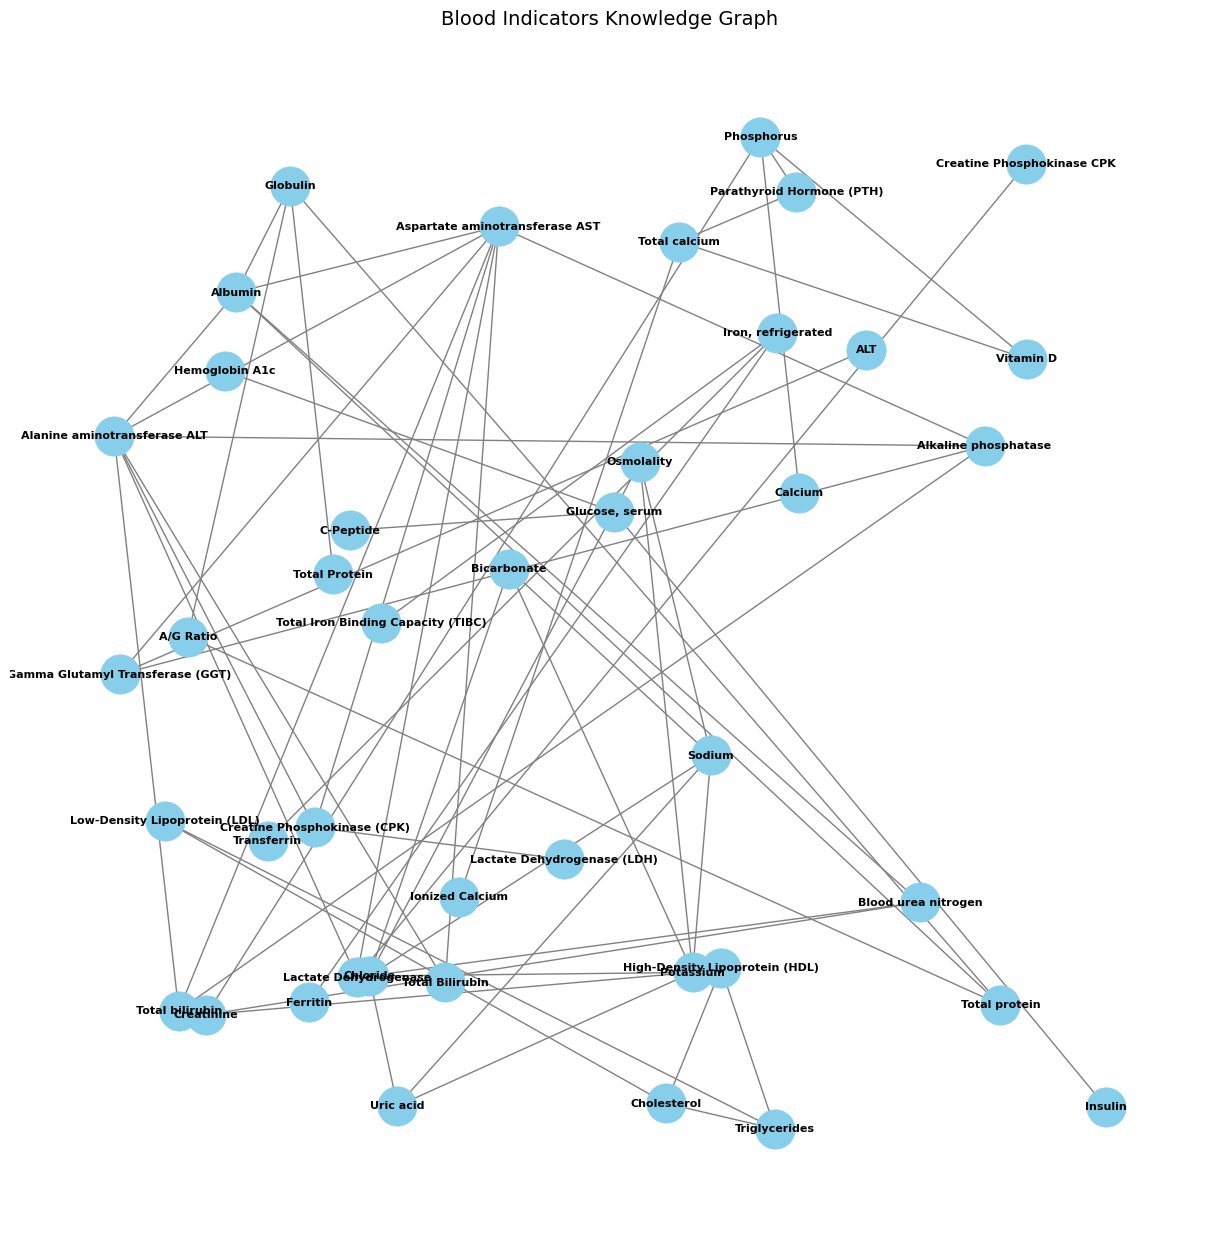

In [22]:

# Choose a different layout algorithm 
layout_list = [
    "circular",
    "kamada_kawai",
    "shell",
    "spring",
    "spectral",
    "random",
    "fruchterman_reingold",
    "spiral",
    "planar",
    "bipartite",
    "multipartite",
    "rescale",
    "barycenter",
    "spectral_layout",
    "circular_layout",
    "random_layout",
    "shell_layout",
    "spring_layout",
    "kamada_kawai_layout",
    "fruchterman_reingold_layout",
    "spiral_layout",
    "planar_layout",
    # Add more layouts as needed
]

pos = nx.random_layout(G)

# Increase the figure size for better visibility
plt.figure(figsize=(12, 12))

# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=800, node_color="skyblue", font_size=8, edge_color="gray", linewidths=0.5)

# Add a title
plt.title("Blood Indicators Knowledge Graph", fontsize=14)

# Show the graph
plt.show()



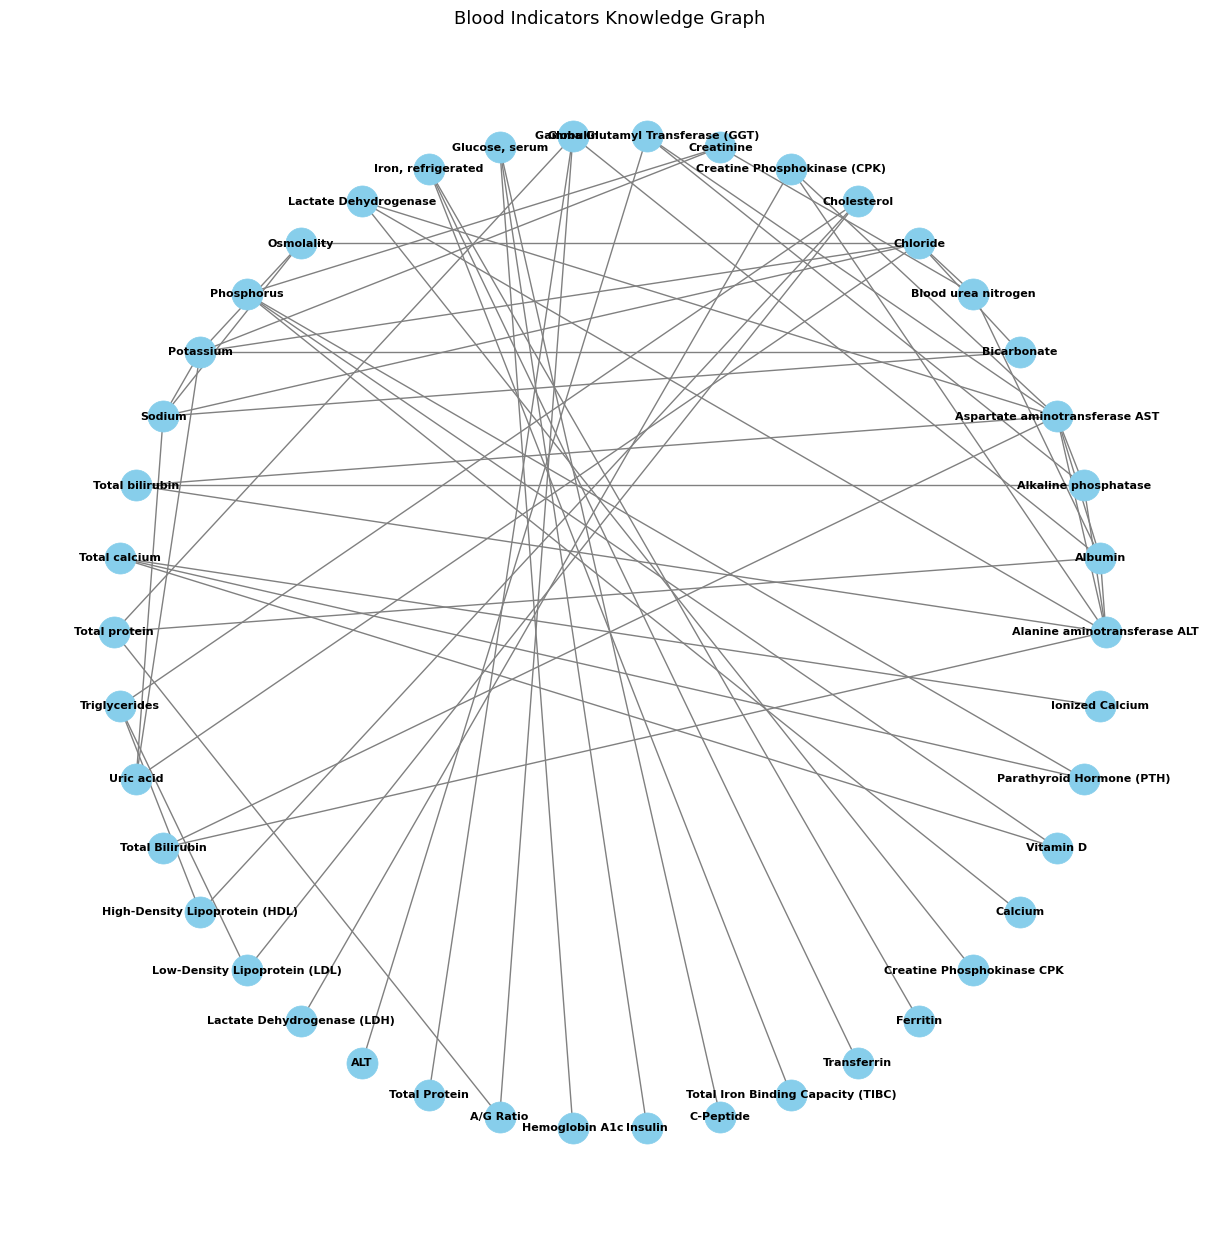

In [23]:
# Choose a different layout algorithm 
layout_list = [
    "circular",
    "kamada_kawai",
    "shell",
    "spring",
    "spectral",
    "random",
    "fruchterman_reingold",
    "spiral",
    "planar",
    "bipartite",
    "multipartite",
    "rescale",
    "barycenter",
    "spectral_layout",
    "circular_layout",
    "random_layout",
    "shell_layout",
    "spring_layout",
    "kamada_kawai_layout",
    "fruchterman_reingold_layout",
    "spiral_layout",
    "planar_layout",
    # Add more layouts as needed
]

pos = nx.circular_layout(G)

# Increase the figure size for better visibility
plt.figure(figsize=(12, 12))

# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color="skyblue", font_size=8, edge_color="gray", linewidths=0.5)

# Add a title
plt.title("Blood Indicators Knowledge Graph", fontsize=13)

# Show the graph
plt.show()


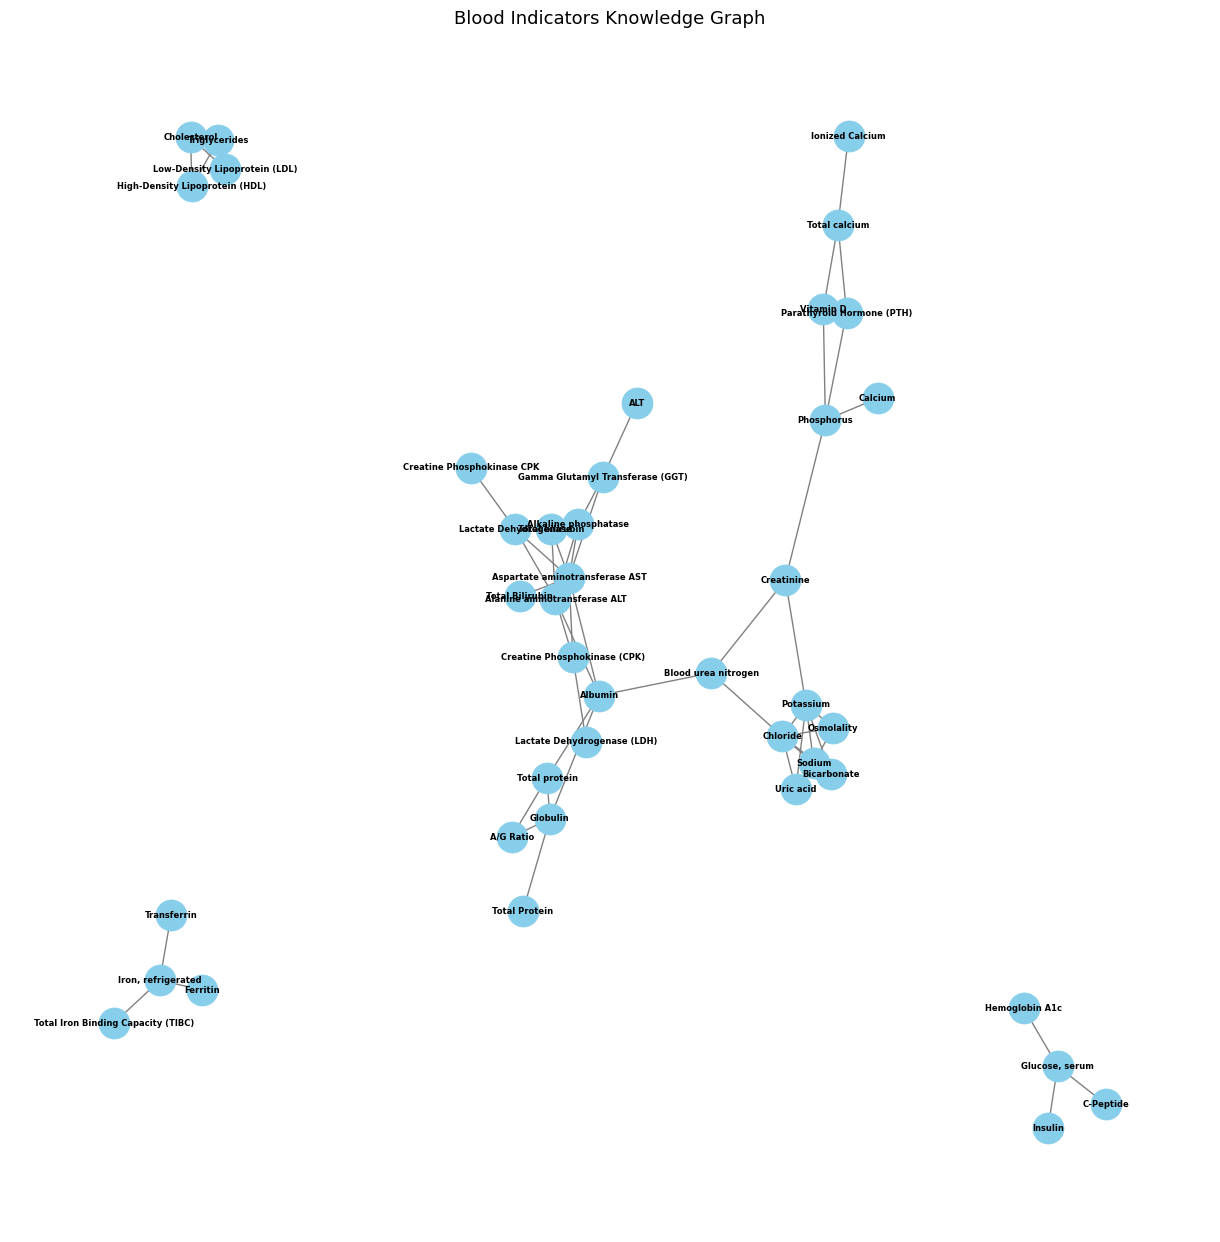

In [24]:
# Choose a different layout algorithm 
layout_list = [
    "circular",
    "kamada_kawai",
    "shell",
    "spring",
    "spectral",
    "random",
    "fruchterman_reingold",
    "spiral",
    "planar",
    "bipartite",
    "multipartite",
    "rescale",
    "barycenter",
    "spectral_layout",
    "circular_layout",
    "random_layout",
    "shell_layout",
    "spring_layout",
    "kamada_kawai_layout",
    "fruchterman_reingold_layout",
    "spiral_layout",
    "planar_layout",
    # Add more layouts as needed
]

pos = nx.fruchterman_reingold_layout(G)

# Increase the figure size for better visibility
plt.figure(figsize=(12, 12))

# Draw the graph with adjusted parameters
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=500, node_color="skyblue", font_size=6, edge_color="gray", linewidths=0.5)

# Add a title
plt.title("Blood Indicators Knowledge Graph", fontsize=13)

# Show the graph
plt.show()